<a href="https://colab.research.google.com/github/Ragnar1999/Deep-learning/blob/master/Morvan_rf_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.15
import tensorflow as tf
tf.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


'1.15.2'

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size])) # 定義一個矩陣, 可使用大寫開頭區分
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) # biases為偏差值, tf.zeros创建的参数, 初始值不為0
    Wx_plus_b = tf.matmul(inputs, Weights) + biases # tf.matmul矩陣乘法
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [0]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise # np.square(平方)


In [0]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [0]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)


In [0]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1])) # tf.reduce_sum求和

In [0]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [0]:
init = tf.global_variables_initializer() # 初始化, 後面才能運算
sess = tf.Session()
sess.run(init)


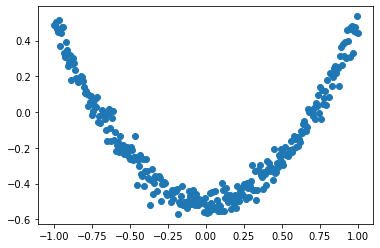

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data) # scatter散點圖
plt.ion() # 本次运行请注释，全局运行不要注释
plt.show()

In [0]:
for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50 == 0:
        # to see the step improvement
        # print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        try:
            ax.lines.remove(lines[0]) # 去除第一條線, 要不然太多條了
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)        
        plt.pause(0.1)